In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/china_gdp.csv')

In [3]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


R² Score: 0.9938


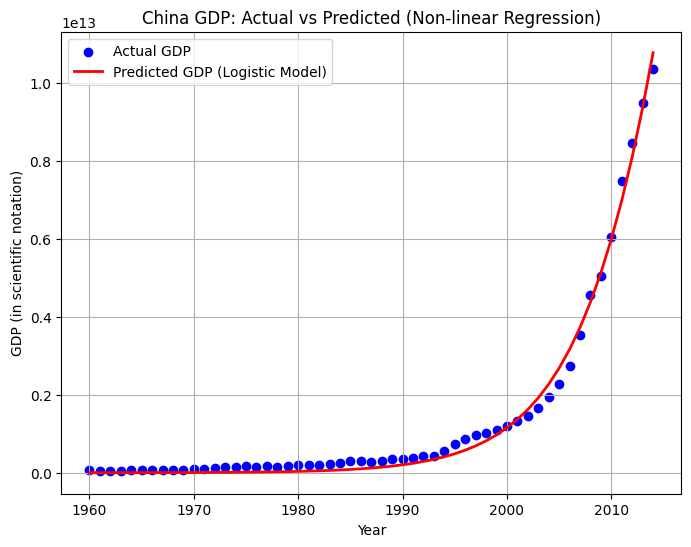

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("china_gdp.csv")  # file with columns: year, value

# Extract columns
x = df["Year"].values
y = df["Value"].values

# Define logistic function for non-linear regression
def logistic(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

# Initial parameter guess
p0 = [0.02, 1990, max(y)]

# Fit the curve
popt, pcov = curve_fit(logistic, x, y, p0)

# Predict values
y_pred = logistic(x, *popt)

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Actual GDP", color="blue")
plt.plot(x, y_pred, label="Predicted GDP (Logistic Model)", color="red", linewidth=2)
plt.xlabel("Year")
plt.ylabel("GDP (in scientific notation)")
plt.title("China GDP: Actual vs Predicted (Non-linear Regression)")
plt.legend()
plt.grid(True)
plt.show()
